In [1]:
import numpy as np
import sympy
from pprint import pprint

In [2]:
def ptm(U, P_list, d):
    if not isinstance(U, list): 
        U = [U]
    def emap(E, rho):
        e_rho = np.array([[0.0, 0.0], [0.0, 0.0]])
        for E_i in E: 
            erhoe = np.dot(E_i, np.dot(rho, E_i.getH()))
            e_rho = e_rho + erhoe
        return e_rho

    mat = []
    for P_i in P_list:
        row = []
        for P_j in P_list:
            E_ij = 1/2 * np.trace(np.dot(P_i, emap(U, P_j)))
            row.append(E_ij)
        mat.append(row)
    return np.array(mat)


In [3]:
I = np.matrix([[1, 0], [0, 1]])
X = np.matrix([[0, 1], [1, 0]])
Y = np.matrix([[0, 1j], [-1j, 0]])
Z = np.matrix([[1, 0], [0, -1]])

P = [I, X, Y, Z]

d = 2

## Pauli Transfar matrix
https://journals.aps.org/prx/pdf/10.1103/PhysRevX.8.031027 のTable 1 についてPauli transfer matrixを計算


In [4]:
# 1 
U = I
E_I = ptm(U, P, d)
print(E_I)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


In [5]:
# 2
U = X
E_sigmaX = ptm(U, P, d)
print(E_sigmaX)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [6]:
# 3
U = Y
E_sigmaY = ptm(U, P, d)
print(E_sigmaY)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [7]:
# 4
U = Z
E_sigmaZ = ptm(U, P, d)
print(E_sigmaZ)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [8]:
# 5
U = 1/np.sqrt(2) * (I + 1J*X)
E_Rx = ptm(U, P, d)
print(E_Rx)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]]


In [9]:
# 6
U = 1/np.sqrt(2) * (I + 1J*Y)
E_Ry = ptm(U, P, d)
print(E_Ry)

[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -2.23711432e-17+0.00000000e+00j]
 [-2.23711432e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+2.23711432e-17j
   1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
   0.00000000e+00+2.23711432e-17j  0.00000000e+00+0.00000000e+00j]]


In [10]:
# 7
U = 1/np.sqrt(2) * (I + 1J*Z)
E_Rz = ptm(U, P, d)
print(E_Rz)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [11]:
# 8
U = 1/np.sqrt(2) * (Y + Z)
E_Ryz = ptm(U, P, d)
print(E_Ryz)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]]


In [12]:
# 9
U = 1/np.sqrt(2) * (Z + X)
E_Rzx = ptm(U, P, d)
print(E_Rzx)

[[ 1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -2.23711432e-17+0.00000000e+00j]
 [-2.23711432e-17+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-2.23711432e-17j
  -1.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   0.00000000e+00-2.23711432e-17j  0.00000000e+00+0.00000000e+00j]]


In [13]:
# 10
U = 1/np.sqrt(2) * (X + Y)
E_Rxy = ptm(U, P, d)
print(E_Rxy)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [14]:
# 11
U = 1/2 * (I + X)
E_PIx = ptm(U, P, d)
print(E_PIx)

[[0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0.5+0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [15]:
# 12
U = 1/2 * (I + Y)
E_PIy = ptm(U, P, d)
print(E_PIy)

[[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]


In [16]:
# 13
U = 1/2 * (I + Z)
E_PIz = ptm(U, P, d)
print(E_PIz)

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [17]:
# 14
U = 1/2 * (Y + 1j*Z)
E_PIyz = ptm(U, P, d)
print(E_PIyz)

[[ 0.5+0.j  0.5+0.j  0. +0.j  0. +0.j]
 [-0.5+0.j -0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


In [18]:
# 15
U = 1/2 * (Z + 1j*X)
E_PIzx = ptm(U, P, d)
print(E_PIzx)


[[ 0.5+0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j -0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]]


In [19]:
# 16
U = 1/2 * (X + 1j*Y)
E_PIxy = ptm(U, P, d)
print(E_PIxy)

[[ 0.5+0.j  0. +0.j  0. +0.j  0.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0. +0.j -0.5+0.j]]


In [20]:
# Define set of Basis operation
Basis_op = [E_I, E_sigmaX, E_sigmaY, E_sigmaZ, E_Rx, E_Ry, E_Rz, E_Ryz, E_Rzx, E_Rxy, E_PIx, E_PIy, E_PIz, E_PIyz, E_PIzx, E_PIxy]

## Probabilistic error cancellation

In [21]:
# Define functions

# compose simultaneous equations
def solve_compose_simulequ(q_list, E_inv):
    equ_list = []
    for i in range(4): 
        for j in range(4):
            equ_ij = 0
            for l in range(16):
                equ_ij += q_list[l]*Basis_op[l][i][j]
            equ_list.append(equ_ij - E_inv[i][j])
    print("Simultaneous equations:\n")
    pprint(equ_list)
    
    solutions = sympy.solve(equ_list)
    print("\nSolutions:\n")
    print(solutions)

    return solutions

# cost of QEM (gamma)
def qem_gamma(solutions):
    values = list(solutions.values())
    qem_gamma = 0
    for q_i in values:
        qem_gamma += abs(q_i)
    print("gamma:", qem_gamma)
    return qem_gamma

# Quasi-probability to probability
def quasi_to_prob(q, gamma):
    p = abs(q)/gamma
    print(p)
    return p

def parity(q):
    if q >= 0:
        return 1
    else:
        return -1

### Depolarizing channel

In [22]:
# p = 0.05
# E_0D = np.sqrt((1 - 3*p/4)) * I
# E_1D = np.sqrt(p/4) * X
# E_2D = np.sqrt(p/4) * Y
# E_3D = np.sqrt(p/4) * Z

# U_D = [E_0D, E_1D, E_2D, E_3D]

# # calculate Pauli transfar matrix
# E_D = ptm(U_D, P, d)
# print("Pauli transfar matrix")
# print(E_D)

# # calculate inverse of PTM
# E_D_inv = np.linalg.inv(E_D)
# print("\nInverse of Pauli transfar matrix")
# print(E_D_inv)

### Dephazing channel

In [23]:
dt = 500
t2 = 10000

p = (1 - np.e**(-2*dt*(1/t2))) / 2
print('probability = ', p)

E_0D = np.sqrt((1 - p)) * I
E_3D = np.sqrt(p) * Z

U_D = [E_0D, E_3D]

# calculate Pauli transfar matrix
E_D = ptm(U_D, P, d)
print("Pauli transfar matrix")
print(E_D)

# calculate inverse of PTM
E_D_inv = np.linalg.inv(E_D)
print("\nInverse of Pauli transfar matrix")
print(E_D_inv)

probability =  0.04758129098202024
Pauli transfar matrix
[[1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.90483742+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.90483742+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.        +0.j]]

Inverse of Pauli transfar matrix
[[1.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.10517092+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 1.10517092+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.        +0.j]]


In [24]:
q_I = sympy.Symbol('q_I')
q_sigmaX = sympy.Symbol('q_sigmaX')
q_sigmaY = sympy.Symbol('q_sigmaY')
q_sigmaZ = sympy.Symbol('q_sigmaZ')
q_Rx = sympy.Symbol('q_Rx')
q_Ry = sympy.Symbol('q_Ry')
q_Rz = sympy.Symbol('q_Rz')
q_Ryz = sympy.Symbol('q_Ryz')
q_Rzx = sympy.Symbol('q_Rzx')
q_Rxy = sympy.Symbol('q_Rxy')
q_PIx = sympy.Symbol('q_PIx')
q_PIy = sympy.Symbol('q_PIy')
q_PIz = sympy.Symbol('q_PIz')
q_PIyz = sympy.Symbol('q_PIyz')
q_PIzx = sympy.Symbol('q_PIzx')
q_PIxy = sympy.Symbol('q_PIxy')

q_list = [q_I, q_sigmaX, q_sigmaY, q_sigmaZ, q_Rx, q_Ry, q_Rz, q_Ryz, q_Rzx, q_Rxy, q_PIx, q_PIy, q_PIz, q_PIyz, q_PIzx, q_PIxy]

solutions_D = solve_compose_simulequ(q_list, E_D_inv)

Simultaneous equations:

[1.0*q_I + 0.5*q_PIx + 0.5*q_PIxy + 0.5*q_PIy + 0.5*q_PIyz + 0.5*q_PIz + 0.5*q_PIzx + 1.0*q_Rx + 1.0*q_Rxy + 1.0*q_Ry + 1.0*q_Ryz + 1.0*q_Rz + 1.0*q_Rzx + 1.0*q_sigmaX + 1.0*q_sigmaY + 1.0*q_sigmaZ - 1.0,
 0.5*q_PIx + 0.5*q_PIyz,
 0.5*q_PIy + 0.5*q_PIzx,
 0.5*q_PIxy + 0.5*q_PIz - 2.23711431707574e-17*q_Ry - 2.23711431707574e-17*q_Rzx,
 0.5*q_PIx - 0.5*q_PIyz - 2.23711431707574e-17*q_Ry - 2.23711431707574e-17*q_Rzx,
 1.0*q_I + 0.5*q_PIx - 0.5*q_PIyz + 1.0*q_Rx - 1.0*q_Ryz + 1.0*q_sigmaX - 1.0*q_sigmaY - 1.0*q_sigmaZ - 1.10517091807565,
 1.0*q_Rxy - 1.0*q_Rz,
 1.0*q_Ry + 1.0*q_Rzx,
 0.5*q_PIy - 0.5*q_PIzx,
 1.0*q_Rxy + 2.23711431707574e-17*I*q_Ry + 1.0*q_Rz - 2.23711431707574e-17*I*q_Rzx,
 1.0*q_I + 0.5*q_PIy - 0.5*q_PIzx + 1.0*q_Ry - 1.0*q_Rzx - 1.0*q_sigmaX + 1.0*q_sigmaY - 1.0*q_sigmaZ - 1.10517091807565,
 -1.0*q_Rx + 1.0*q_Ryz,
 -0.5*q_PIxy + 0.5*q_PIz,
 -1.0*q_Ry + 1.0*q_Rzx,
 1.0*q_Rx + 2.23711431707574e-17*I*q_Ry + 1.0*q_Ryz - 2.23711431707574e-17*I*q_Rzx,

In [25]:
gamma_D = qem_gamma(solutions_D)
P_I = quasi_to_prob(solutions_D[q_I], gamma_D)
P_sigmaX = quasi_to_prob(solutions_D[q_sigmaX], gamma_D)
P_sigmaY = quasi_to_prob(solutions_D[q_sigmaY], gamma_D)
P_sigmaZ = quasi_to_prob(solutions_D[q_sigmaZ], gamma_D)

gamma: 1.10517091807565
0.952418709017979
0
0
0.0475812909820212


## Simulation on Qiskit

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_state_city, plot_histogram
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info.operators import Operator

from math import pi
from random import random

import time
from multiprocessing import Process
from multiprocessing import Manager
from multiprocessing import Pool

In [27]:
Ntrial = 100

In [28]:
# compose single qubit quantum circuit

qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

circuit_depth = 11
qc.h(qr[0])
qc.barrier()
for _ in range(circuit_depth):
    qc.z(qr[0])
    qc.barrier()
qc.h(qr[0])
qc.barrier()
qc.measure(qr, cr)
print(qc)

      ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ »
q0_0: ┤ H ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─»
      └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ »
c0: 1/════════════════════════════════════════════════════════════════════════»
                                                                              »
«      ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌───┐ ░ ┌─┐
«q0_0: ┤ Z ├─░─┤ Z ├─░─┤ Z ├─░─┤ H ├─░─┤M├
«      └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░ └╥┘
«c0: 1/═════════════════════════════════╩═
«                                       0 


In [29]:
# # compose depolarizing error circuit

# depol_circs = []

# def depolarizing(circuit, qreg):
    
#     # Monte Carlo method
#     r = random()
#     if r<(1-3*p/4):
#         circuit.id(qreg)
#     elif r>=(1-3*p/4) and r<(1-3*p/4)+p/4:
#         circuit.x(qreg)
#     elif r>=(1-3*p/4)+p/4 and r<(1-3*p/4)+p/4+p/4:
#         circuit.y(qreg)
#     elif r>=(1-3*p/4)+p/4+p/4:
#         circuit.z(qreg)

# def compose_depolarizing_circuit(depth):
#     qr_depol = QuantumRegister(1)
#     cr_depol = ClassicalRegister(1)
#     qc_depol = QuantumCircuit(qr_depol, cr_depol)

#     parity = 1
#     for _ in range(depth):
#         qc_depol.x(qr_depol[0])
#         depolarizing(qc_depol, qr_depol[0])
#         qc.barrier()

#     qc_depol.measure(qr_depol, cr_depol)
    
#     return qc_depol

# # compose probabilistic error cancellation circuit

# def recover(circuit, qreg, parity):
    
#     # Monte Carlo method
#     r = random()
#     if r<P_I:
#         circuit.id(qreg)
#     elif r>=P_I and r<P_I+P_sigmaX:
#         circuit.x(qreg)
#         parity *= -1
#     elif r>=P_I+P_sigmaX and r<P_I+P_sigmaX+P_sigmaY:
#         circuit.y(qreg)
#         parity *= -1
#     elif r>=P_I+P_sigmaX+P_sigmaY:
#         circuit.z(qreg)
#         parity *= -1
#     return parity

# def compose_pec_circuit(depth):
#     qr_pec = QuantumRegister(1)
#     cr_pec = ClassicalRegister(1)
#     qc_pec = QuantumCircuit(qr_pec, cr_pec)

#     parity = 1
#     for _ in range(depth):
#         qc_pec.x(qr_pec[0])
#         depolarizing(qc_pec, qr_pec[0])
#         parity = recover(qc_pec, qr_pec[0], parity)
#         qc.barrier()

#     qc_pec.measure(qr_pec, cr_pec)
#     return qc_pec, parity

In [42]:
# compose dephazing error circuit

def dephazing(circuit, qreg, dt, t2):

    # calculate CPTP probability from Lindblad master equation 
    p = (1 - np.e**(-2*dt*(1/t2))) / 2

    # Monte Carlo method
    r = random()
    if r<(p):
        circuit.z(qreg)
    elif r>=p:
        circuit.id(qreg)

def compose_dephazing_circuit(depth, dt, t2):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    qc.h(qr[0])
    dephazing(qc, qr[0], dt, t2)
    qc.barrier()
    for _ in range(circuit_depth):
        qc.z(qr[0])
        dephazing(qc, qr[0], dt, t2)
        qc.barrier()
    qc.h(qr[0])
    dephazing(qc, qr[0], dt, t2)
    qc.barrier()

    qc.measure(qr, cr)
    
    return qc

# compose probabilistic error cancellation circuit

def recover(circuit, qreg, parity):
    
    # Monte Carlo method
    r = random()
    if r<P_I:
        circuit.id(qreg)
    elif r>=P_I:
        circuit.z(qreg)
        parity *= -1
    return parity

def compose_pec_circuit(depth, dt, t2):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)

    parity = 1
    qc.h(qr[0])
    dephazing(qc, qr[0], dt, t2)
    qc.barrier()
    for _ in range(depth):
        qc.z(qr[0])
        dephazing(qc, qr[0], dt, t2)
        parity = recover(qc, qr[0], parity)
        qc.barrier()
    qc.h(qr[0])
    dephazing(qc, qr[0], dt, t2)
    qc.barrier()

    qc.measure(qr, cr)
    return qc, parity

## Execute on Qiskit Aer simulator

In [43]:
# number of data points
T = 100


# define backend simulator
simulator = Aer.get_backend('qasm_simulator')

In [44]:
def expectation_value(dist):
    gra_pop = dist.get('0', 0)
    exc_pop = dist.get('1', 0)
    return (gra_pop*1 + exc_pop*(-1)) / (gra_pop+exc_pop)



In [45]:
# def execute_noiseless(qcircuit):  
#     qobj = assemble(qcircuit)
#     job = simulator.run(qobj, shots=10000)
#     counts_noiseless= job.result().get_counts()
#     e = expectation_value(counts_noiseless)
#     print("Expectation Value: ", e)
#     return e

# def execute_noisy(backend, depth, trial):
#     # compose circuit list
#     noisy_circs = []
#     for _ in range(trial):
#         noisy_circs.append(compose_depolarizing_circuit(depth))
    
#     # execute
#     counts = {'0': 0, '1': 0}
#     for qc in n_circs:
#         qobj = assemble(qc)
#         job = backend.run(qobj, shots=1)
#         _counts= job.result().get_counts()
#         counts['0'] += _counts.get('0', 0)
#         counts['1'] += _counts.get('1', 0)
    
#     e = expectation_value(counts)
#     print("Expectation Value: ", e)
#     return e


# def execute_pec(backend, depth, trial, gamma):
    
#     # compose pec circuit list
#     pec_circs = []
#     for _ in range(trial):
#         qc_pec, parity = compose_pec_circuit(depth)
#         pec_circs.append((qc_pec, parity))
    
#     # execute 
#     counts = {'0': 0, '1': 0}
#     for qc, parity in pec_circs:
#         qobj = assemble(qc)
#         job = backend.run(qobj, shots=1)
#         _counts= job.result().get_counts()
#         if parity==1:
#             counts['0'] += _counts.get('0', 0)
#             counts['1'] += _counts.get('1', 0)
#         else:
#             counts['0'] += _counts.get('1', 0)
#             counts['1'] += _counts.get('0', 0)
#     gamma_tot = gamma**depth
#     e = expectation_value(counts) * gamma_tot
#     print("Expectation Value: ", e)
    
#     return float(e)

In [46]:
def execute_noiseless(qcircuit):  
    qobj = assemble(qcircuit)
    job = simulator.run(qobj, shots=T)
    counts_noiseless= job.result().get_counts()
    e = expectation_value(counts_noiseless)
    print("Expectation Value: ", e)
    return e

def execute_noisy(backend, depth, trial, dt, t2):
    # compose circuit list
    noisy_circs = []
    for _ in range(trial):
        noisy_circs.append(compose_dephazing_circuit(depth, dt, t2))
    
    # execute
    counts = {'0': 0, '1': 0}
    for qc in noisy_circs:
        qobj = assemble(qc)
        job = backend.run(qobj, shots=1)
        _counts= job.result().get_counts()
        counts['0'] += _counts.get('0', 0)
        counts['1'] += _counts.get('1', 0)
    
    e = expectation_value(counts)
    print("Expectation Value: ", e)
    return e


def execute_pec(backend, depth, trial, gamma, dt, t2):
    
    # compose pec circuit list
    pec_circs = []
    for _ in range(trial):
        qc_pec, parity = compose_pec_circuit(depth, dt, t2)
        pec_circs.append((qc_pec, parity))
    
    # execute 
    counts = {'0': 0, '1': 0}
    for qc, parity in pec_circs:
        qobj = assemble(qc)
        job = backend.run(qobj, shots=1)
        _counts= job.result().get_counts()
        if parity==1:
            counts['0'] += _counts.get('0', 0)
            counts['1'] += _counts.get('1', 0)
        else:
            counts['0'] += _counts.get('1', 0)
            counts['1'] += _counts.get('0', 0)
    gamma_tot = gamma**depth
    e = expectation_value(counts) * gamma_tot
    print("Expectation Value: ", e)
    
    return float(e)

In [47]:
# e_noiseless = []
# for _ in range(T):
#     _e = execute_noiseless()
#     e_noiseless.append(_e)

# 時間短縮のために
e_noiseless = [-1.0 for _ in range(T)]

In [48]:
# execute noisy circuit
e_noisy = []
for _ in range(T):
    _e_noisy = execute_noisy(simulator, circuit_depth, Ntrial, dt, t2)
    e_noisy.append(_e_noisy)

Expectation Value:  -0.32
Expectation Value:  -0.24
Expectation Value:  -0.22
Expectation Value:  -0.24
Expectation Value:  -0.26
Expectation Value:  -0.12
Expectation Value:  -0.32
Expectation Value:  -0.4
Expectation Value:  -0.26
Expectation Value:  -0.28
Expectation Value:  -0.32
Expectation Value:  -0.3
Expectation Value:  -0.08
Expectation Value:  -0.18
Expectation Value:  -0.22
Expectation Value:  -0.28
Expectation Value:  -0.48
Expectation Value:  -0.26
Expectation Value:  -0.3
Expectation Value:  -0.38
Expectation Value:  -0.34
Expectation Value:  -0.08
Expectation Value:  -0.16
Expectation Value:  -0.48
Expectation Value:  -0.32
Expectation Value:  -0.22
Expectation Value:  -0.36
Expectation Value:  -0.4
Expectation Value:  -0.52
Expectation Value:  -0.3
Expectation Value:  -0.38
Expectation Value:  -0.2
Expectation Value:  -0.42
Expectation Value:  -0.36
Expectation Value:  -0.16
Expectation Value:  -0.48
Expectation Value:  -0.26
Expectation Value:  -0.3
Expectation Value: 

## Probabilistic Error cancellation

In [50]:
e_pec = []
for _ in range(T):
    _e_pec = execute_pec(simulator, circuit_depth, Ntrial, gamma_D, dt, t2) 
    e_pec.append(_e_pec)

Expectation Value:  -1.08149976862074
Expectation Value:  -0.781083166226091
Expectation Value:  -0.540749884310370
Expectation Value:  -1.20166640957860
Expectation Value:  -0.961333127662881
Expectation Value:  -0.660916525268231
Expectation Value:  -0.660916525268231
Expectation Value:  -0.901249807183951
Expectation Value:  -0.420583243352510
Expectation Value:  -0.781083166226091
Expectation Value:  -1.02141644814181
Expectation Value:  -0.901249807183951
Expectation Value:  -0.720999845747160
Expectation Value:  -1.26174973005753
Expectation Value:  -0.0600833204789300
Expectation Value:  -0.841166486705021
Expectation Value:  -1.08149976862074
Expectation Value:  -1.08149976862074
Expectation Value:  -0.781083166226091
Expectation Value:  -1.14158308909967
Expectation Value:  -1.20166640957860
Expectation Value:  -1.20166640957860
Expectation Value:  -1.08149976862074
Expectation Value:  -0.841166486705021
Expectation Value:  -1.32183305053646
Expectation Value:  -0.781083166226

## Plot result

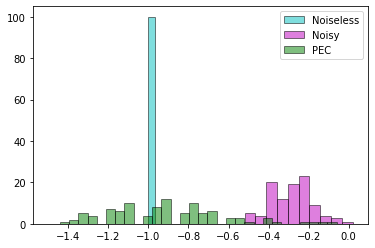

In [51]:
import matplotlib.pyplot as plt
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(e_noiseless, color='c', edgecolor='k', alpha=0.5, bins=30, label='Noiseless')
ax.hist(e_noisy, color='m', edgecolor='k', alpha=0.5, bins=10, label="Noisy")
ax.hist(e_pec, color='g', edgecolor='k', alpha=0.5, bins=30, label="PEC")


plt.legend()
plt.show()

## Execute on Qulacs simulator

In [52]:
import time
from collections import Counter

import numpy as np
import qulacs
from qiskit import QuantumCircuit


def get_noise_gate_list(target_index_list: list, noise_map_list: list) -> list:
    """Get noise gate list from list of CPTP maps

    Generate noise gate list for qulacs circuit
    In the case of probabilistic X and Z noise on 0-th and 2-nd qubits,
    target_index_list = [0,2]
    noise_map_list = [noise_X, noise_Z]
    where
    noise_X = [sqrt(1-px)*I, sqrt(px)*X]
    noise_Z = [sqrt(1-pz)*I, sqrt(pz)*Z]
    I = [[1,0], [0,1]]
    X = [[0,1], [1,0]]
    Z = [[1,0], [0,-1]]

    Args:
        target_index_list (list): List of target indices of noisy gates
        noise_map_list (list): List of CPTP maps. Each CPTP map has list of Kraus operators as matrix.

    Returns:
        list: list of noise gates
    """
    noise_gate_list = []
    for kraus_mat_list in noise_map_list:
        for target_index in target_index_list:
            kraus_op_list = []
            for kraus_mat in kraus_mat_list:
                kraus_op = qulacs.gate.DenseMatrix([target_index], kraus_mat)
                kraus_op_list.append(kraus_op)
            noise = qulacs.gate.CPTP(kraus_op_list)
            noise_gate_list.append(noise)
        return noise_gate_list
    return noise_gate_list


def simulate_with_qulacs(num_qubit: int, qiskit_circuit: QuantumCircuit, num_shots: int, noise_model: list = None) -> dict:
    """Simulate qiskit's quantum circuit with qulacs

    Simulate qunatum circuit defined by qiskit with qulacs.
    We can apply noise to the quantum circuit.
    If noise_model is None, quantum circuit is assumed to be noiseless.

    We assume quantum circuit is finally measured by Z-basis.
    Thus, the "measure" gate is ignored.

    If we need to simulate noisy quantum circuit, noise model must be a list of which the length is equal to that of qiskit_circuit.
    The i-th element of noise_model contains noise_map_list of the i-th gate.
    See get_noise_gate_list function for the definition of noise_map_list.

    Args:
        num_qubit (int): number of qubits
        qiskit_circuit (QuantumCircuit): qiskit's quantum circuit
        num_shots (int): number of shots to measure
        noise_model (list, optional): noise model. Defaults to None.

    Raises:
        ValueError: information of noise model is invalid, or unknown gate name is contained in quantum circuit

    Returns:
        dict: list of shots
    """
    if noise_model is not None and len(noise_model) != len(qiskit_circuit):
        raise ValueError()
    qulacs_circuit = qulacs.QuantumCircuit(num_qubit)
    state = qulacs.DensityMatrix(num_qubit)

    for gate_index, gate in enumerate(qiskit_circuit):
        # get gate
        gate_name = gate[0].name
        gate_name_to_func = {
            "x": qulacs.gate.X,
            "y": qulacs.gate.Y,
            "z": qulacs.gate.Z,
            "h": qulacs.gate.H,
            "cx": qulacs.gate.CNOT,
            "id": qulacs.gate.Identity,
            "measure": None,
        }
        if gate_name not in gate_name_to_func:
            raise ValueError("gate {} is not implemented".format(gate_name))
        gate_func = gate_name_to_func[gate_name]

        # get index
        target_index_list = [target_qubit_info.index for target_qubit_info in gate[1]]

        # add gate
        if gate_func is not None:
            gate = gate_func(*target_index_list)
            gate.update_quantum_state(state)
gate_index
        # add noise
        if noise_model is not None:
            noise_map_list = noise_model[]
            noise_gate_list = get_noise_gate_list(target_index_list, noise_map_list)
            for noise_gate in noise_gate_list:
                noise_gate.update_quantum_state(state)

    shot_result = state.sampling(num_shots)
    shot_dict = dict(Counter(shot_result))
    return shot_dict

In [64]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def build_circuit(num_qubit: int, num_depth: int) -> QuantumCircuit:
    """Build test circuit with qiskit

    Args:
        num_qubit (int): number of qubit
        num_depht (int): number of depth

    Returns:
        QuantumCircuit: qiskit's qunatum circuit
    """
    num_qreg = num_qubit
    num_creg = num_qubit
    qreg = QuantumRegister(num_qreg)
    creg = ClassicalRegister(num_creg)
    circuit = QuantumCircuit(qreg, creg)
    
    circuit.h(0)
    for _ in range(num_depth):
        circuit.z(0)
    circuit.h(0)
    circuit.measure(qreg, creg)
    return circuit


def get_dephase_noise(error_prob: float) -> list:
    """Get noise map of dephasing noise

    Args:
        error_prob (float): error probability

    Returns:
        list: list of kraus operators
    """
    I = np.eye(2, dtype=complex)
    Z = np.array([[1, 0], [0, -1]], dtype=complex)
    dephase = [np.sqrt(1 - error_prob) * I, np.sqrt(error_prob) * Z]
    return dephase


def get_bitflip_noise(error_prob: float) -> list:
    """Get noise map of bitflip noise

    Args:
        error_prob (float): error probability

    Returns:
        list: list of kraus operators
    """
    I = np.eye(2, dtype=complex)
    X = np.array([[0, 1], [1, 0]], dtype=complex)
    dephase = [np.sqrt(1 - error_prob) * I, np.sqrt(error_prob) * X]
    return dephase



# create circuit
num_qubit = 1
num_depth = 11
qiskit_circuit = build_circuit(num_qubit, num_depth)
num_gate = len(qiskit_circuit)
print(qiskit_circuit)

# simulate without noise
num_shot = 1
result = simulate_with_qulacs(num_qubit, qiskit_circuit, num_shot)
print("clean", result)

# simulate with noise
def get_noise_model(error_prob: float, num_gate: int) -> dict:
    # create noise model: i-th element is list of CPTP map. Each CPTP-map is a list of Kraus operators.
    noise_per_gate = [get_dephase_noise(error_prob), get_bitflip_noise(error_prob)]
    noise_model = [noise_per_gate] * num_gate
    return noise_model


          ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
q40003_0: ┤ H ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ Z ├┤ H ├┤M├
          └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└╥┘
c40003: 1/══════════════════════════════════════════════════════════════════╩═
                                                                            0 
clean {1: 1}


In [65]:
error_prob = (1 - np.e**(-2*dt*(1/t2))) / 2

noise_model = get_noise_model(error_prob, num_gate)
result = simulate_with_qulacs(num_qubit, qiskit_circuit, num_shot, noise_model)
print("error_rate={}".format(error_prob), result)

error_rate=0.04758129098202024 {0: 1}


In [66]:
def execute_noisy(depth, trial, dt, t2):
    # execute
    counts = {'0': 0, '1': 0}
    for _ in range(trial):
        noise_model = get_noise_model(error_prob, num_gate)
        _counts = simulate_with_qulacs(num_qubit, qiskit_circuit, num_shot, noise_model)
        counts['0'] += _counts.get(0, 0)
        counts['1'] += _counts.get(1, 0)  
    e = expectation_value(counts)
    print("Expectation Value: ", e)
    return e

In [67]:
# execute noisy circuit
error_prob = (1 - np.e**(-2*dt*(1/t2))) / 2
e_noisy = []
for _ in range(T):
    _e_noisy = execute_noisy(circuit_depth, Ntrial, dt, t2)
    e_noisy.append(_e_noisy)

Expectation Value:  -0.26
Expectation Value:  -0.3
Expectation Value:  -0.36
Expectation Value:  -0.22
Expectation Value:  -0.32
Expectation Value:  -0.38
Expectation Value:  -0.24
Expectation Value:  -0.32
Expectation Value:  -0.24
Expectation Value:  -0.18
Expectation Value:  -0.16
Expectation Value:  -0.28
Expectation Value:  -0.36
Expectation Value:  -0.18
Expectation Value:  -0.2
Expectation Value:  -0.26
Expectation Value:  -0.38
Expectation Value:  -0.12
Expectation Value:  -0.28
Expectation Value:  -0.44
Expectation Value:  -0.34
Expectation Value:  -0.2
Expectation Value:  -0.08
Expectation Value:  -0.06
Expectation Value:  -0.36
Expectation Value:  -0.3
Expectation Value:  -0.3
Expectation Value:  -0.22
Expectation Value:  -0.36
Expectation Value:  -0.42
Expectation Value:  -0.42
Expectation Value:  -0.4
Expectation Value:  -0.16
Expectation Value:  -0.24
Expectation Value:  -0.34
Expectation Value:  -0.24
Expectation Value:  -0.32
Expectation Value:  -0.34
Expectation Value: